In [2]:
from google.colab import files
uploaded= files.upload()

Saving parkinsons_data.txt to parkinsons_data.txt


**Import the libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation

In [4]:
prankinson_data= pd.read_csv('parkinsons_data.txt')
prankinson_data.head(11)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


**Prankinsons Column Description**
*   name - ASCII subject name and recording number
*   MDVP:Fo(Hz) - Average vocal fundamental frequency
*   MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
*   MDVP:Flo(Hz) - Minimum vocal fundamental frequency
*   MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
    measures of variation in fundamental frequency
*   MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,  
    Shimmer:DDA - Several measures of variation in amplitude
*   NHR,HNR - Two measures of ratio of noise to tonal components in the voice
*   status - Health status of the subject (one) - Parkinson's, (zero) - healthy
*   RPDE,D2 - Two nonlinear dynamical complexity measures
*   DFA - Signal fractal scaling exponent
*   spread1,spread2,PPE - Three nonlinear measures of fundamental frequency     
    variation 


In [5]:
prankinson_data.shape

(195, 24)

In [6]:
prankinson_data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

**Checking Null Values**

In [7]:
prankinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Label Encoding isn't require as the dataset doesn't have any categorical variable

**Splitting the dataset**

random_state — Here you pass an integer, which will act as the seed for the random number generator during the split

In [8]:
#Create Feature(X) and target(y) variable
X= prankinson_data.iloc[:,:17]
X = X.iloc[:,1:]
y= prankinson_data['status']

#DataFlair - Scale the features to between -1 and 1
scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=21)

print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(156, 16) (156,)
(39, 16) (39,)


**Logistic Regression**

In [9]:
log_reg= LogisticRegression(C=10)

log_reg.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred_prob= log_reg.predict(X_test)
lr_matrix= confusion_matrix(y_test,y_pred_prob)
print('Confusion Matrix \n',lr_matrix)
print('Classification Report \n',classification_report(y_test,y_pred_prob))

score_lr_test= log_reg.score(X_test,y_test)
score_lr_train= log_reg.score(X_train,y_train)
print('Accuracy:',accuracy_score(y_test,y_pred_prob)*100)
print('LR Score with train set:',score_lr_train*100)
print('LR Score with test set:',score_lr_test*100)

Confusion Matrix 
 [[ 4  5]
 [ 1 29]]
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.85      0.97      0.91        30

    accuracy                           0.85        39
   macro avg       0.83      0.71      0.74        39
weighted avg       0.84      0.85      0.83        39

Accuracy: 84.61538461538461
LR Score with train set: 82.05128205128204
LR Score with test set: 84.61538461538461


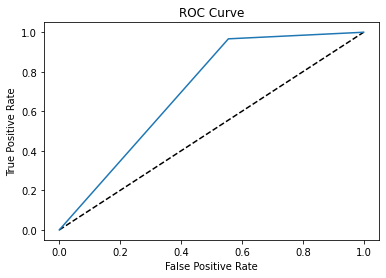

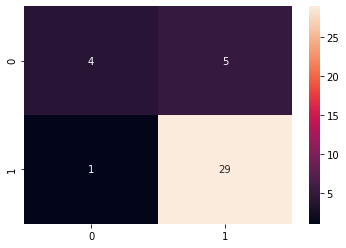

In [11]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr,thresholds= roc_curve(y_test,y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
sns.heatmap(lr_matrix,annot=True)
plt.show()

**Random Forest Classifier**

In [12]:
RF= RandomForestClassifier(n_estimators=10,max_features='log2',max_depth=10)
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Confusion Matrix 
 [[ 7  2]
 [ 1 29]]
Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.94      0.97      0.95        30

    accuracy                           0.92        39
   macro avg       0.91      0.87      0.89        39
weighted avg       0.92      0.92      0.92        39

Accuracy: 92.3076923076923
RF Score with train set: 98.71794871794873
RF Score with test set: 92.3076923076923


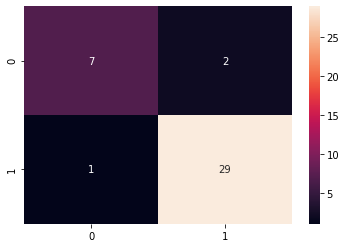

In [13]:
y_pred_rf= RF.predict(X_test)
rf_matrix=confusion_matrix(y_test,y_pred_rf)
print('Confusion Matrix \n',rf_matrix)
print('Classification Report \n',classification_report(y_test,y_pred_rf))

score_rf_test= RF.score(X_test,y_test)
score_rf_train= RF.score(X_train,y_train)
print('Accuracy:',accuracy_score(y_test,y_pred_rf)*100)
print('RF Score with train set:',score_rf_train*100)
print('RF Score with test set:',score_rf_test*100)

sns.heatmap(rf_matrix,annot=True)
plt.show()

**K-Nearest Neighbour Algorithm**

In [14]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Confusion Matrix 
 [[ 8  1]
 [ 1 29]]
Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.97      0.97      0.97        30

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39

Accuracy: 94.87179487179486
KNN Score with train set: 100.0
KNN Score with test set: 94.87179487179486


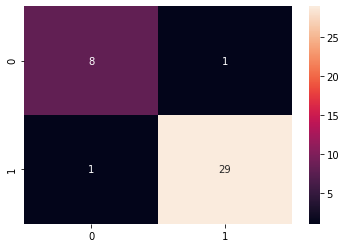

In [15]:
y_pred_knn= knn.predict(X_test)
knn_matrix=confusion_matrix(y_test,y_pred_knn)
print('Confusion Matrix \n',knn_matrix)
print('Classification Report \n',classification_report(y_test,y_pred_knn))

score_knn_test= knn.score(X_test,y_test)
score_knn_train= knn.score(X_train,y_train)
print('Accuracy:',accuracy_score(y_test,y_pred_knn)*100)
print('KNN Score with train set:',score_knn_train*100)
print('KNN Score with test set:',score_knn_test*100)

sns.heatmap(knn_matrix,annot=True)
plt.show()

**Gradient Boosting Classsifier**

In [16]:
xgb_model= XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Confusion Matrix 
 [[ 8  1]
 [ 2 28]]
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.97      0.93      0.95        30

    accuracy                           0.92        39
   macro avg       0.88      0.91      0.90        39
weighted avg       0.93      0.92      0.92        39

Accuracy: 92.3076923076923
KNN Score with train set: 100.0
KNN Score with test set: 92.3076923076923


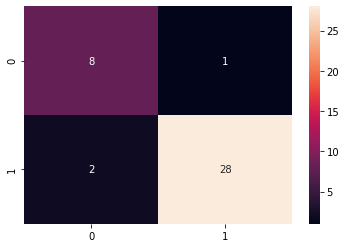

In [17]:
y_pred_xgb= xgb_model.predict(X_test)
xgb_matrix=confusion_matrix(y_test,y_pred_xgb)
print('Confusion Matrix \n',xgb_matrix)
print('Classification Report \n',classification_report(y_test,y_pred_xgb))

score_xgb_test= xgb_model.score(X_test,y_test)
score_xgb_train= xgb_model.score(X_train,y_train)
print('Accuracy:',accuracy_score(y_test,y_pred_xgb)*100)
print('KNN Score with train set:',score_xgb_train*100)
print('KNN Score with test set:',score_xgb_test*100)

sns.heatmap(xgb_matrix,annot=True)
plt.show()

**Final Note**

We get accuracy of 94.87% by using K-nearest neighbour Classification model.